In [1]:
NAME = "Anthony Kontos"

# Stock Time Series Analysis

In this analysis we will be plotting and analyzing the correlation between four stocks: AMZN, FB, IBM, MMM


In [4]:
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

In [16]:
# Option 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)

[*********************100%***********************]  1 of 1 completed


In [17]:
# Option 2) Using yfinance library only to download AMZN data

amzn = yf.download('AMZN', start=start)

[*********************100%***********************]  1 of 1 completed


In [5]:
# If we want to download multipe stocks into a single dataframe:
start = datetime.datetime(2016, 7, 1)

all_stocks_list = ['AMZN', 'FB', 'IBM', 'MMM']
all_stocks = yf.download(all_stocks_list, start = start)

[*********************100%***********************]  4 of 4 completed


In [ ]:
## TYPE YOUE CODE BELOW

In [20]:
## Resample the data to get prices for the end of the business month. 
## Select the Adjusted Close for each stock.

adj_close = pd.DataFrame(all_stocks['Adj Close'])

adj_close_end = adj_close.asfreq(freq='BM') 

adj_close = adj_close.resample('D').ffill()

adj_close_end = adj_close.asfreq(freq='BM')
adj_close_end.head(61)

,AMZN,FB,IBM,MMM
Date,,,,
2016-07-29,758.809998,123.940002,128.608139,153.941116
2016-08-31,769.159973,126.120003,128.313599,155.664581
2016-09-30,837.309998,128.270004,128.289398,153.050507
2016-10-31,789.820007,130.990005,124.122078,143.558121
2016-11-30,750.570007,118.419998,132.199585,150.107330
...,...,...,...,...
2021-03-31,3094.080078,294.529999,131.787506,191.272461
2021-04-30,3467.419922,325.079987,140.312271,195.699890
2021-05-31,3223.070068,328.730011,143.740005,203.039993


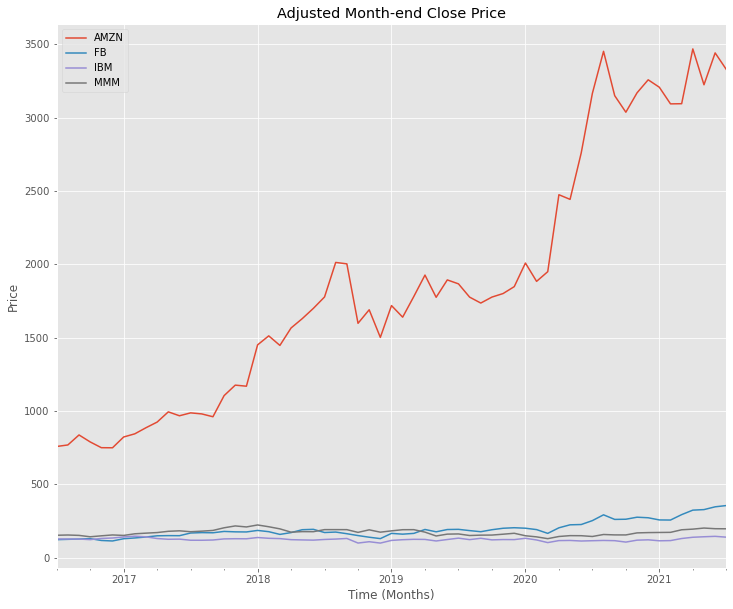

In [21]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
from pandas.plotting import autocorrelation_plot

#4
adj_close_end_plot = adj_close_end.plot()
adj_close_end_plot.set_title("Adjusted Month-end Close Price")
adj_close_end_plot.set_ylabel("Price")
adj_close_end_plot.set_xlabel("Time (Months)")

plt.rc('figure', figsize=(6, 4))


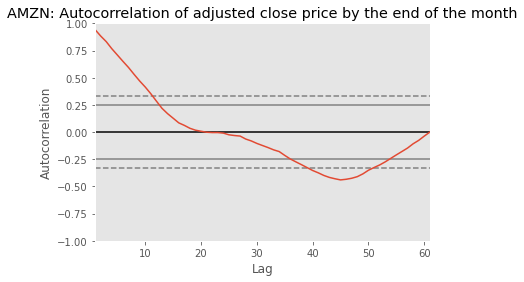

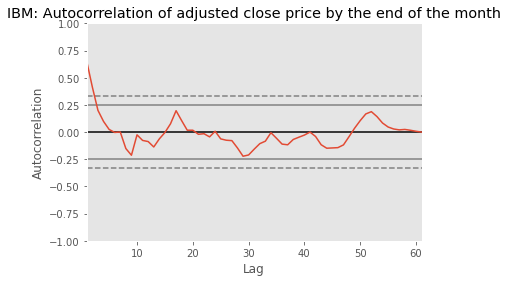

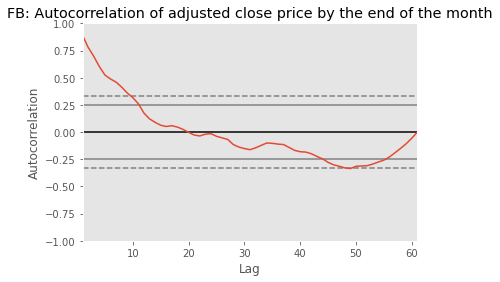

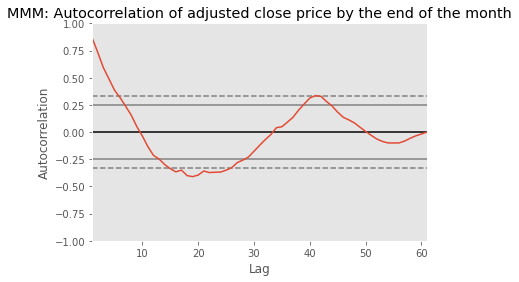

In [22]:
#4 Cont'd

## AMZN
amzn_ac_plot = pd.plotting.autocorrelation_plot(adj_close_end['AMZN'])
amzn_ac_plot.set_title("AMZN: Autocorrelation of adjusted close price by the end of the month")
plt.show(amzn_ac_plot)

## The autocorrelation plot for AMZN shows statistical significance between lags
## 0-12 and between lags 38-51 as the autocorrelation passes the 99% 
## confidence interval band (dashed lines)

## IBM
ibm_ac_plot = pd.plotting.autocorrelation_plot(adj_close_end['IBM'])
ibm_ac_plot.set_title("IBM: Autocorrelation of adjusted close price by the end of the month")
plt.show(ibm_ac_plot)

## The autocorrelation plot for IBM shows statistical significance between lags
## 0-2 as the autocorrelation passes the 99% confidence interval band (dashed
## lines)

## FB
fb_ac_plot = pd.plotting.autocorrelation_plot(adj_close_end['FB'])
fb_ac_plot.set_title("FB: Autocorrelation of adjusted close price by the end of the month")
plt.show(fb_ac_plot)

## The autocorrelation plot for FB shows statistical significance between lags
## 0-10 as the autocorrelation passes the 99% confidence interval band (dashed
## lines)


## MMM
mmm_ac_plot = pd.plotting.autocorrelation_plot(adj_close_end['MMM'])
mmm_ac_plot.set_title("MMM: Autocorrelation of adjusted close price by the end of the month")
plt.show(mmm_ac_plot)

## The autocorrelation plot for AMZN shows statistical significance between lags
## 1-5 and between lags 15-27 as the autocorrelation passes the 99% 
## confidence interval band (dashed lines)



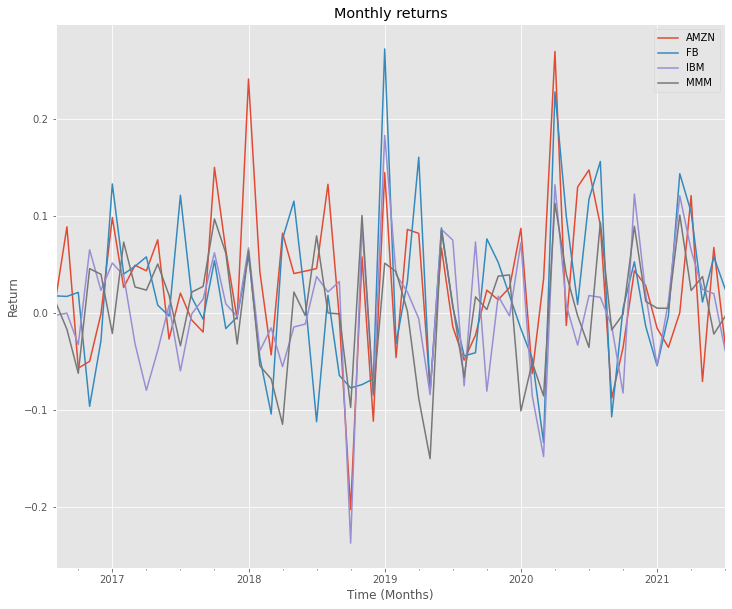

In [27]:
#5

adj_close_monthly = adj_close_end.shift(periods=1,fill_value=0.0)
adj_close_monthly.head()

adj_close_end.head()

monthly_returns = (adj_close_end - adj_close_monthly)/adj_close_monthly
monthly_returns =  monthly_returns[1:]
monthly_returns.head()

monthly_returns_plot = monthly_returns.plot()
monthly_returns_plot.set_title("Monthly returns")
monthly_returns_plot.set_ylabel("Return")
monthly_returns_plot.set_xlabel("Time (Months)")

plt.show(monthly_returns_plot)

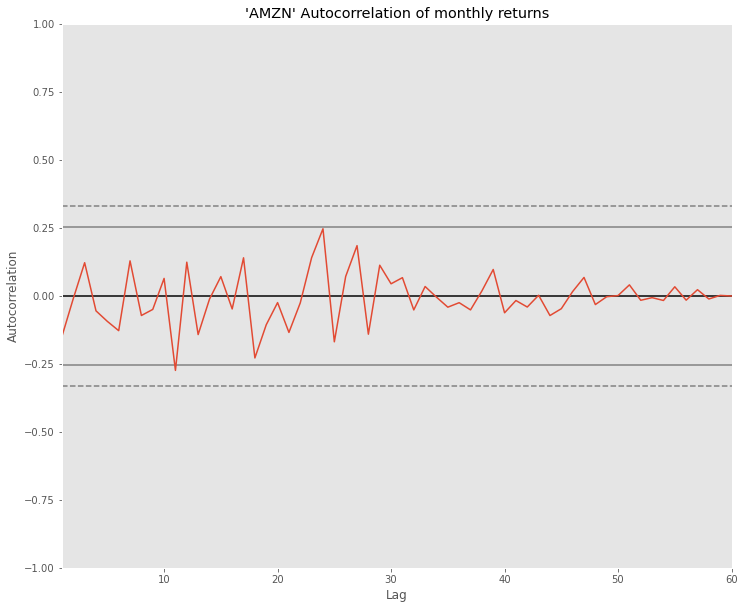

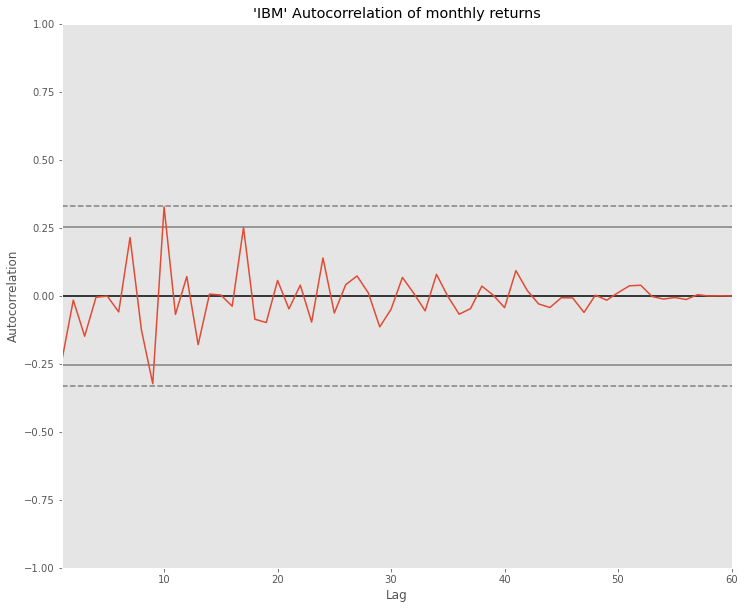

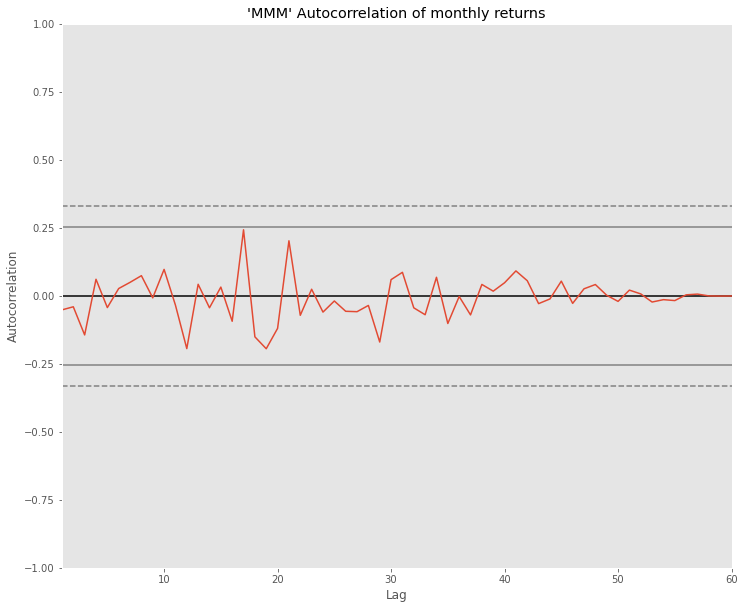

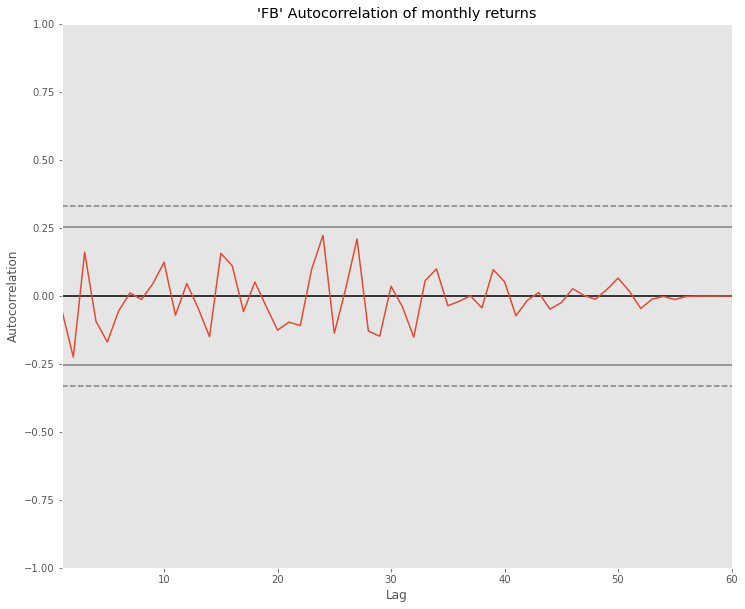

In [29]:
#5 Cont'd

# AMZN 
amzn_ac_plot = pd.plotting.autocorrelation_plot(monthly_returns['AMZN'])
amzn_ac_plot.set_title("AMZN - Autocorrelation of monthly returns")
plt.show(amzn_ac_plot)

# IBM 
ibm_ac_plot = pd.plotting.autocorrelation_plot(monthly_returns['IBM'])
ibm_ac_plot.set_title("IBM - Autocorrelation of monthly returns")
plt.show(ibm_ac_plot)

# MMM 
mmm_ac_plot = pd.plotting.autocorrelation_plot(monthly_returns['MMM'])
mmm_ac_plot.set_title("MMM - Autocorrelation of monthly returns")
plt.show(mmm_ac_plot)

# FB 
fb_ac_plot = pd.plotting.autocorrelation_plot(monthly_returns['FB'])
fb_ac_plot.set_title("FB -autocorrelation of monthly returns")
plt.show(fb_ac_plot)

## The autocorrelation plots for AMZN, IBM, MM, and FB do not show 
## statistical significance, no spikes pass the dashed line for any lags --
## they are all close to zero.


array([[<AxesSubplot:xlabel='AMZN', ylabel='AMZN'>,
        <AxesSubplot:xlabel='FB', ylabel='AMZN'>,
        <AxesSubplot:xlabel='IBM', ylabel='AMZN'>,
        <AxesSubplot:xlabel='MMM', ylabel='AMZN'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='FB'>,
        <AxesSubplot:xlabel='FB', ylabel='FB'>,
        <AxesSubplot:xlabel='IBM', ylabel='FB'>,
        <AxesSubplot:xlabel='MMM', ylabel='FB'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='IBM'>,
        <AxesSubplot:xlabel='FB', ylabel='IBM'>,
        <AxesSubplot:xlabel='IBM', ylabel='IBM'>,
        <AxesSubplot:xlabel='MMM', ylabel='IBM'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='MMM'>,
        <AxesSubplot:xlabel='FB', ylabel='MMM'>,
        <AxesSubplot:xlabel='IBM', ylabel='MMM'>,
        <AxesSubplot:xlabel='MMM', ylabel='MMM'>]], dtype=object)

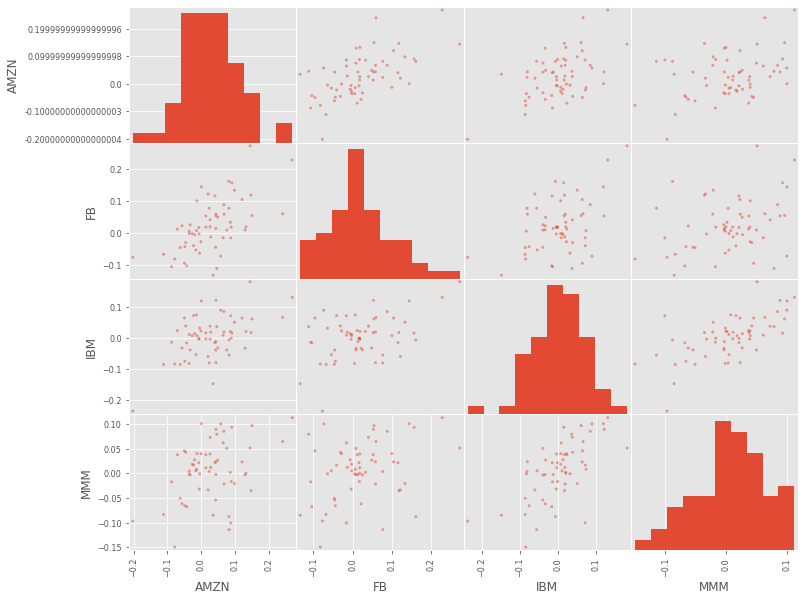

In [33]:
#6
plt.rc('figure', figsize=(12, 10))
pd.plotting.scatter_matrix(monthly_returns, alpha=0.5,  grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05)

## the highest positive correlation between any two stocks exists between 
## IBM and MMM followed by FB and AMZN as these scatterplots are less
## heteroscedastic

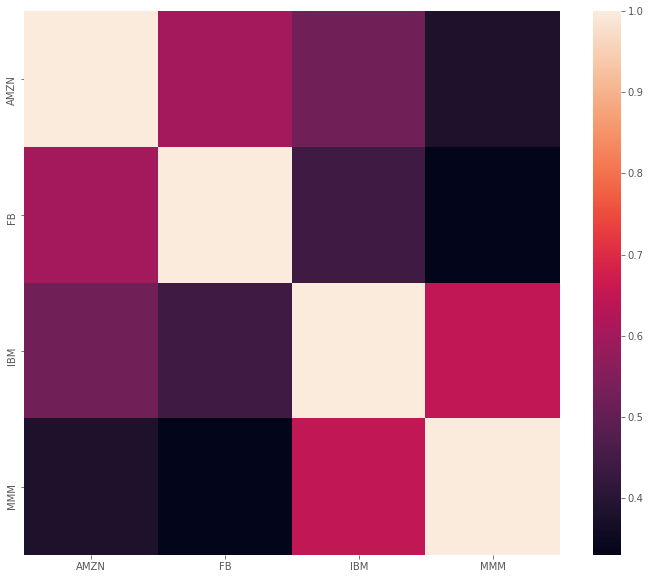

In [34]:
import seaborn as sns

cormat = monthly_returns.corr()
sns.heatmap(cormat);